# Test DSOM

In [31]:
import random
import numpy as np
import deep_som as ds
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Generate data

In [32]:
np.random.seed(1)

num_data = 1000
dim = 257
sample_length = 150
num_clusters = 3
variance = 0.2
clusters = []
labels = []
colors = []
cmap = plt.cm.get_cmap('RdBu')

# define clusters centers
for i in range(num_clusters):
    cluster = np.random.rand(dim, sample_length, 1)
    clusters.append(cluster)
    labels.extend([i] * num_data)
    colors.extend([cmap(float(i) / num_clusters)] * num_data)

training_data = np.empty((dim, sample_length, 0), float)
# generate samples for each cluster
for i, c in enumerate(clusters):
    data = c + 0.1 * np.random.rand(dim, sample_length, num_data)
    training_data = np.append(training_data, data, axis=-1)

training_data = np.transpose(training_data, (2, 1, 0))

print("training data shape: ",training_data.shape)

#shuffle them
training_data, labels, colors = shuffle(training_data, labels, colors)
training_data = training_data.reshape(training_data.shape[0] * training_data.shape[1], training_data.shape[2])

training data shape:  (3000, 150, 257)


## Create model

In [33]:
dsom = ds.DeepSom()
dsom.add_layer(100, 100, 257)
dsom.add_layer(100, 100, 30)
dsom.add_layer(100, 100, 20)

## Train model

In [34]:
dsom.train(training_data, verbose=1)

training 1 layer out of 3
training 2 layer out of 3
training 3 layer out of 3


{'som_0': array([[63,  3],
        [75, 48],
        [82,  0],
        ..., 
        [ 0,  0],
        [84, 30],
        [25, 70]], dtype=int64), 'som_1': array([[74, 33],
        [78, 65],
        [31, 25],
        ..., 
        [97,  0],
        [ 1, 79],
        [ 9,  1]], dtype=int64), 'som_2': array([[15, 92],
        [ 5, 23],
        [50,  3],
        ..., 
        [98, 50],
        [72, 48],
        [33, 60]], dtype=int64)}

## See results

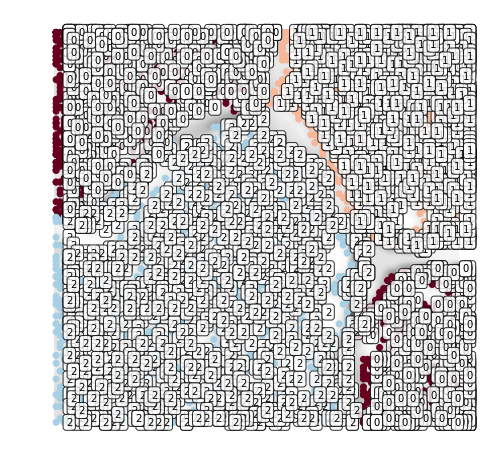

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [35]:
dsom._layers["som_2"].view_umatrix(colormap=cm.binary, bestmatches=True, bestmatchcolors=colors, labels=labels)